# Loan Application Status Prediction

## Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [586]:
# importing necessery librabry 
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

## Loading the dataset

In [587]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

## Statical Analysis

In [588]:
df.shape

(614, 13)

We have 614 row and 13 columns in the dataset

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- We have float64(4), int64(1), object(8) and it use 62.5+ KB 
- We have null values in some column 

In [590]:
# Checking the null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We have null values in Gender, Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term, and Credit_History

In [591]:
df.shape[0]

614

In [592]:
df.nunique().to_frame()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [593]:
# droping the Loan_ID
df.drop('Loan_ID',inplace=True,axis=1)

In [594]:
df2=df

In [595]:
df2.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Treating the null value

In [596]:
from sklearn.experimental import enable_iterative_imputer
# Import Iteravtive Imputer
from sklearn.impute import IterativeImputer

In [597]:
iter_impute =IterativeImputer()

In [598]:
iter_imp=pd.DataFrame(iter_impute.fit_transform(df[['ApplicantIncome','Loan_Amount_Term']]),columns=['ApplicantIncome','Loan_Amount_Term'])
iter_imp

,ApplicantIncome,Loan_Amount_Term
0,5849.0,360.0
1,4583.0,360.0
2,3000.0,360.0
3,2583.0,360.0
4,6000.0,360.0
...,...,...
609,2900.0,360.0
610,4106.0,180.0
611,8072.0,360.0
612,7583.0,360.0


In [599]:
iter_imp.Loan_Amount_Term.unique()

array([360.        , 120.        , 240.        , 343.25644155,
       343.59880787, 342.32735158, 342.89722299, 180.        ,
        60.        , 300.        , 342.3007428 , 480.        ,
       342.82537928, 342.76550952, 343.56377298, 341.04879961,
       342.99523201,  36.        ,  84.        , 341.96901999,
       342.13709879, 343.20322398, 341.19426096,  12.        ])

In [600]:
iter_imp.loc[(iter_imp['Loan_Amount_Term'] > 340 )& (iter_imp['Loan_Amount_Term'] < 460), 'Loan_Amount_Term'] = 360

In [601]:
iter_imp.Loan_Amount_Term.unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [602]:
df['Loan_Amount_Term']=iter_imp['Loan_Amount_Term']

In [603]:
iter_imp=pd.DataFrame(iter_impute.fit_transform(df[['ApplicantIncome','Loan_Amount_Term','Credit_History']]),columns=['ApplicantIncome','Loan_Amount_Term','Credit_History'])
iter_imp

,ApplicantIncome,Loan_Amount_Term,Credit_History
0,5849.0,360.0,1.0
1,4583.0,360.0,1.0
2,3000.0,360.0,1.0
3,2583.0,360.0,1.0
4,6000.0,360.0,1.0
...,...,...,...
609,2900.0,360.0,1.0
610,4106.0,180.0,1.0
611,8072.0,360.0,1.0
612,7583.0,360.0,1.0


In [604]:
iter_imp.Credit_History.unique()

array([1.        , 0.        , 0.84641569, 0.84328531, 0.8428938 ,
       0.84443369, 0.84362015, 0.84129462, 0.84061274, 0.84459587,
       0.84330711, 0.84122486, 0.82591751, 0.84485572, 0.84444851,
       0.84354777, 0.84279178, 0.8415161 , 0.84350679, 0.84222675,
       0.84122225, 0.84295135, 0.83984106, 0.84847331, 0.8447319 ,
       0.84343878, 0.84376576, 0.84100426, 0.84541161, 0.84276824,
       0.84427412, 0.84366985, 0.8410714 , 0.84164473, 0.84411193,
       0.84633153, 0.8447101 , 0.84434649, 0.84417297, 0.84187622,
       0.85126571, 0.84299495, 0.82836078, 0.84563264, 0.83671681,
       0.84389569, 0.84420087, 0.84263134, 0.84488711, 0.85070098])

In [605]:
iter_imp.loc[iter_imp['Credit_History'] > 0.5 , 'Credit_History'] = 1

In [606]:
iter_imp.Credit_History.unique()

array([1., 0.])

In [607]:
df['Credit_History']=iter_imp['Credit_History']

In [608]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [609]:
# df.head(20)

In [610]:
# df.dropna(inplace=True,axis=0)

In [611]:
from sklearn.preprocessing import LabelEncoder

In [612]:
lab_enc=LabelEncoder()

In [613]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [614]:
for i in df[['Gender','Married','Education','Self_Employed', 'Property_Area', 'Loan_Status']]:
    df1=lab_enc.fit_transform(df[i])
    pd.Series(df1)
    df[i]=df1
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [615]:
df.Gender.unique()

array([1, 0, 2])

In [616]:
df.loc[df['Gender'] > 1, 'Gender'] = np.nan
iter_imp=pd.DataFrame(iter_impute.fit_transform(df[['ApplicantIncome','Loan_Amount_Term','Gender']]),columns=['ApplicantIncome','Loan_Amount_Term','Gender'])
iter_imp

,ApplicantIncome,Loan_Amount_Term,Gender
0,5849.0,360.0,1.0
1,4583.0,360.0,1.0
2,3000.0,360.0,1.0
3,2583.0,360.0,1.0
4,6000.0,360.0,1.0
...,...,...,...
609,2900.0,360.0,0.0
610,4106.0,180.0,1.0
611,8072.0,360.0,1.0
612,7583.0,360.0,1.0


In [617]:
iter_imp.Gender.unique()

array([1.        , 0.        , 0.79969757, 0.87019946, 0.99151677,
       0.79041484, 0.79662058, 0.89661298, 0.79527525, 0.84566972,
       0.7980004 , 0.80044958, 0.7987386 , 0.8044752 , 0.82036727])

In [618]:
iter_imp.loc[iter_imp['Gender'] > 0.5 , 'Gender'] = 1

In [619]:
iter_imp.Gender.unique()

array([1., 0.])

In [620]:
df['Gender']=iter_imp['Gender']

In [621]:
df.Married.unique()

array([0, 1, 2])

In [622]:
df.loc[df['Married'] > 1, 'Married'] = np.nan
iter_imp=pd.DataFrame(iter_impute.fit_transform(df[['ApplicantIncome','Loan_Amount_Term','Gender','Married']]),columns=['ApplicantIncome','Loan_Amount_Term','Gender','Married'])
iter_imp

,ApplicantIncome,Loan_Amount_Term,Gender,Married
0,5849.0,360.0,1.0,0.0
1,4583.0,360.0,1.0,1.0
2,3000.0,360.0,1.0,1.0
3,2583.0,360.0,1.0,1.0
4,6000.0,360.0,1.0,0.0
...,...,...,...,...
609,2900.0,360.0,0.0,0.0
610,4106.0,180.0,1.0,1.0
611,8072.0,360.0,1.0,1.0
612,7583.0,360.0,1.0,1.0


In [623]:
iter_imp.Married.unique()

array([0.        , 1.        , 0.71675396, 0.65378617, 0.36411118])

In [624]:
iter_imp.loc[iter_imp['Married'] > 0.5 , 'Married'] = 1
iter_imp.loc[iter_imp['Married'] < 0.5 , 'Married'] = 0

In [625]:
iter_imp.Married.unique()

array([0., 1.])

In [626]:
df['Married']=iter_imp['Married']

In [627]:
df.loc[df['Dependents'] == '3+', 'Dependents'] = 3
df.loc[df['Dependents'] == '0', 'Dependents'] = 0
df.loc[df['Dependents'] == '1', 'Dependents'] = 1
df.loc[df['Dependents'] == '2', 'Dependents'] = 2
iter_imp=pd.DataFrame(iter_impute.fit_transform(df[['ApplicantIncome','Loan_Amount_Term','Gender','Married','Dependents']]),columns=['ApplicantIncome','Loan_Amount_Term','Gender','Married','Dependents'])
iter_imp

,ApplicantIncome,Loan_Amount_Term,Gender,Married,Dependents
0,5849.0,360.0,1.0,0.0,0.0
1,4583.0,360.0,1.0,1.0,1.0
2,3000.0,360.0,1.0,1.0,0.0
3,2583.0,360.0,1.0,1.0,0.0
4,6000.0,360.0,1.0,0.0,0.0
...,...,...,...,...,...
609,2900.0,360.0,0.0,0.0,0.0
610,4106.0,180.0,1.0,1.0,3.0
611,8072.0,360.0,1.0,1.0,1.0
612,7583.0,360.0,1.0,1.0,2.0


In [628]:
iter_imp.Dependents.unique()

array([0.        , 1.        , 2.        , 3.        , 1.12247213,
       0.96376687, 0.99363909, 0.97859808, 0.86201654, 0.10768157,
       0.94858061, 0.32010318, 0.99099239, 0.95903831, 0.37417735,
       0.41630792, 0.95179216, 0.98474682, 0.3225885 ])

In [629]:
iter_imp.loc[(iter_imp['Dependents'] > 0.5)  & (iter_imp['Dependents'] < 1.5), 'Dependents'] = 1
iter_imp.loc[iter_imp['Dependents'] < 0.5 , 'Dependents'] = 0

In [630]:
iter_imp.Dependents.unique()

array([0., 1., 2., 3.])

In [631]:
df['Dependents']=iter_imp['Dependents']

In [632]:
df.Self_Employed.unique()

array([0, 1, 2])

In [633]:
df.loc[df['Self_Employed'] > 1, 'Self_Employed'] = np.nan
iter_imp=pd.DataFrame(iter_impute.fit_transform(df[['ApplicantIncome','Loan_Amount_Term','Gender','Married','Dependents','Self_Employed']]),columns=['ApplicantIncome','Loan_Amount_Term','Gender','Married','Dependents','Self_Employed'])
iter_imp

,ApplicantIncome,Loan_Amount_Term,Gender,Married,Dependents,Self_Employed
0,5849.0,360.0,1.0,0.0,0.0,0.0
1,4583.0,360.0,1.0,1.0,1.0,0.0
2,3000.0,360.0,1.0,1.0,0.0,1.0
3,2583.0,360.0,1.0,1.0,0.0,0.0
4,6000.0,360.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
609,2900.0,360.0,0.0,0.0,0.0,0.0
610,4106.0,180.0,1.0,1.0,3.0,0.0
611,8072.0,360.0,1.0,1.0,1.0,0.0
612,7583.0,360.0,1.0,1.0,2.0,0.0


In [634]:
iter_imp.Self_Employed.unique()

array([0.        , 1.        , 0.1134666 , 0.11418754, 0.12372592,
       0.12408541, 0.12753448, 0.14966713, 0.15434088, 0.11698757,
       0.13497577, 0.11741739, 0.10757134, 0.13467237, 0.15574646,
       0.14087288, 0.121142  , 0.12978235, 0.66147014, 0.1367293 ,
       0.11417063, 0.11559457, 0.12040507, 0.15540104, 0.14519886,
       0.20135831, 0.12215243, 0.13624478, 0.09405147, 0.11377   ,
       0.1231905 , 0.11913082, 0.1279617 , 0.11668134])

In [635]:
iter_imp.loc[iter_imp['Self_Employed'] > 0.5 , 'Self_Employed'] = 1
iter_imp.loc[iter_imp['Self_Employed'] < 0.5 , 'Self_Employed'] = 0

In [636]:
df['Self_Employed']=iter_imp['Self_Employed']

In [637]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [638]:
# checking the unique value
df.nunique().to_frame()

,0
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


In [639]:
df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,0,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,0,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,0,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,1.0,1.0,2.0,0,1.0,5417,4196.0,267.0,360.0,1.0,2,1
6,1.0,1.0,0.0,1,0.0,2333,1516.0,95.0,360.0,1.0,2,1
7,1.0,1.0,3.0,0,0.0,3036,2504.0,158.0,360.0,0.0,1,0
8,1.0,1.0,2.0,0,0.0,4006,1526.0,168.0,360.0,1.0,2,1
9,1.0,1.0,1.0,0,0.0,12841,10968.0,349.0,360.0,1.0,1,0


After encoding
- Gender :- Male is 1 and Female is 0
- Married :- No is 0 and Yes is 1
- Education :- Graduate is 0 and Not Graduate is 1
- Self Employed :- No is 0 and yes is 1
- Property_Area :- urban is 2 , Rural is 0 and Semiurban is 1
- Loan_status :- Y is 1 and N is 0

In [640]:
# Removing the null value
df.dropna(inplace=True,axis=0)

In [641]:
df.shape

(592, 12)

In [642]:
# Checking the dataframe info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             592 non-null    float64
 1   Married            592 non-null    float64
 2   Dependents         592 non-null    float64
 3   Education          592 non-null    int32  
 4   Self_Employed      592 non-null    float64
 5   ApplicantIncome    592 non-null    int64  
 6   CoapplicantIncome  592 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   592 non-null    float64
 9   Credit_History     592 non-null    float64
 10  Property_Area      592 non-null    int32  
 11  Loan_Status        592 non-null    int32  
dtypes: float64(8), int32(3), int64(1)
memory usage: 53.2 KB


In [643]:
# Creating a new copy 
df1=df

### Creating new feature

In [644]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,0,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,0,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,0,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,1.0,1.0,2.0,0,1.0,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,1.0,1.0,3.0,0,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,1.0,1.0,1.0,0,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,1.0,1.0,2.0,0,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [645]:
df1['LoanAmount_per_month']=df['LoanAmount']/df['Loan_Amount_Term']
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_per_month
1,1.0,1.0,1.0,0,0.0,4583,1508.0,128.0,360.0,1.0,0,0,0.355556
2,1.0,1.0,0.0,0,1.0,3000,0.0,66.0,360.0,1.0,2,1,0.183333
3,1.0,1.0,0.0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,1,0.333333
4,1.0,0.0,0.0,0,0.0,6000,0.0,141.0,360.0,1.0,2,1,0.391667
5,1.0,1.0,2.0,0,1.0,5417,4196.0,267.0,360.0,1.0,2,1,0.741667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0,0.0,2900,0.0,71.0,360.0,1.0,0,1,0.197222
610,1.0,1.0,3.0,0,0.0,4106,0.0,40.0,180.0,1.0,0,1,0.222222
611,1.0,1.0,1.0,0,0.0,8072,240.0,253.0,360.0,1.0,2,1,0.702778
612,1.0,1.0,2.0,0,0.0,7583,0.0,187.0,360.0,1.0,2,1,0.519444


In [646]:
df1.shape

(592, 13)

After treating null and encoding we have left 592 rows and 13 columns.

In [647]:
df1.nunique().to_frame()

,0
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,487
CoapplicantIncome,278
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


We have ApplicantIncome, CoapplicantIncome, LoanAmount, and LoanAmount_per_month continues value all other are categorical value

In [648]:
df1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_per_month
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,0.815878,0.652027,0.760135,0.214527,0.135135,5404.304054,1642.633311,146.412162,342.567568,0.856419,1.030405,0.694257,0.476576
std,0.387911,0.476730,1.005854,0.410841,0.342157,6164.073003,2967.717486,85.587325,64.719325,0.350961,0.784206,0.461111,0.519933
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.025000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2887.250000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,0.283333
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3806.000000,1221.000000,128.000000,360.000000,1.000000,1.000000,1.000000,0.362500
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5754.500000,2312.000000,168.000000,360.000000,1.000000,2.000000,1.000000,0.507778
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000,9.250000


From description:-

**Only for continues data**

1.All column have 592 values so no missing value present.

2.The std is higher for ApplicantIncome, CoapplicationIncome , LoanAmount and LoanAmount_per_month

3.All the minimum value are value and possible

4.The difference between min,25%,50%,75% and max for ApplicantIncome, CoapplicationIncome , LoanAmount and LoanAmount_per_month.

5.The mean value is greater than median (50%) for ApplicantIncome, CoapplicationIncome , LoanAmount and LoanAmount_per_month. which mean data is right skewed.

## Graphical Analysis

### Univarient Analysis

In [649]:
import matplotlib.pyplot as plt
import seaborn as sns

In [650]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_per_month'],
      dtype='object')

In [727]:
dfint=df1[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','LoanAmount_per_month']]

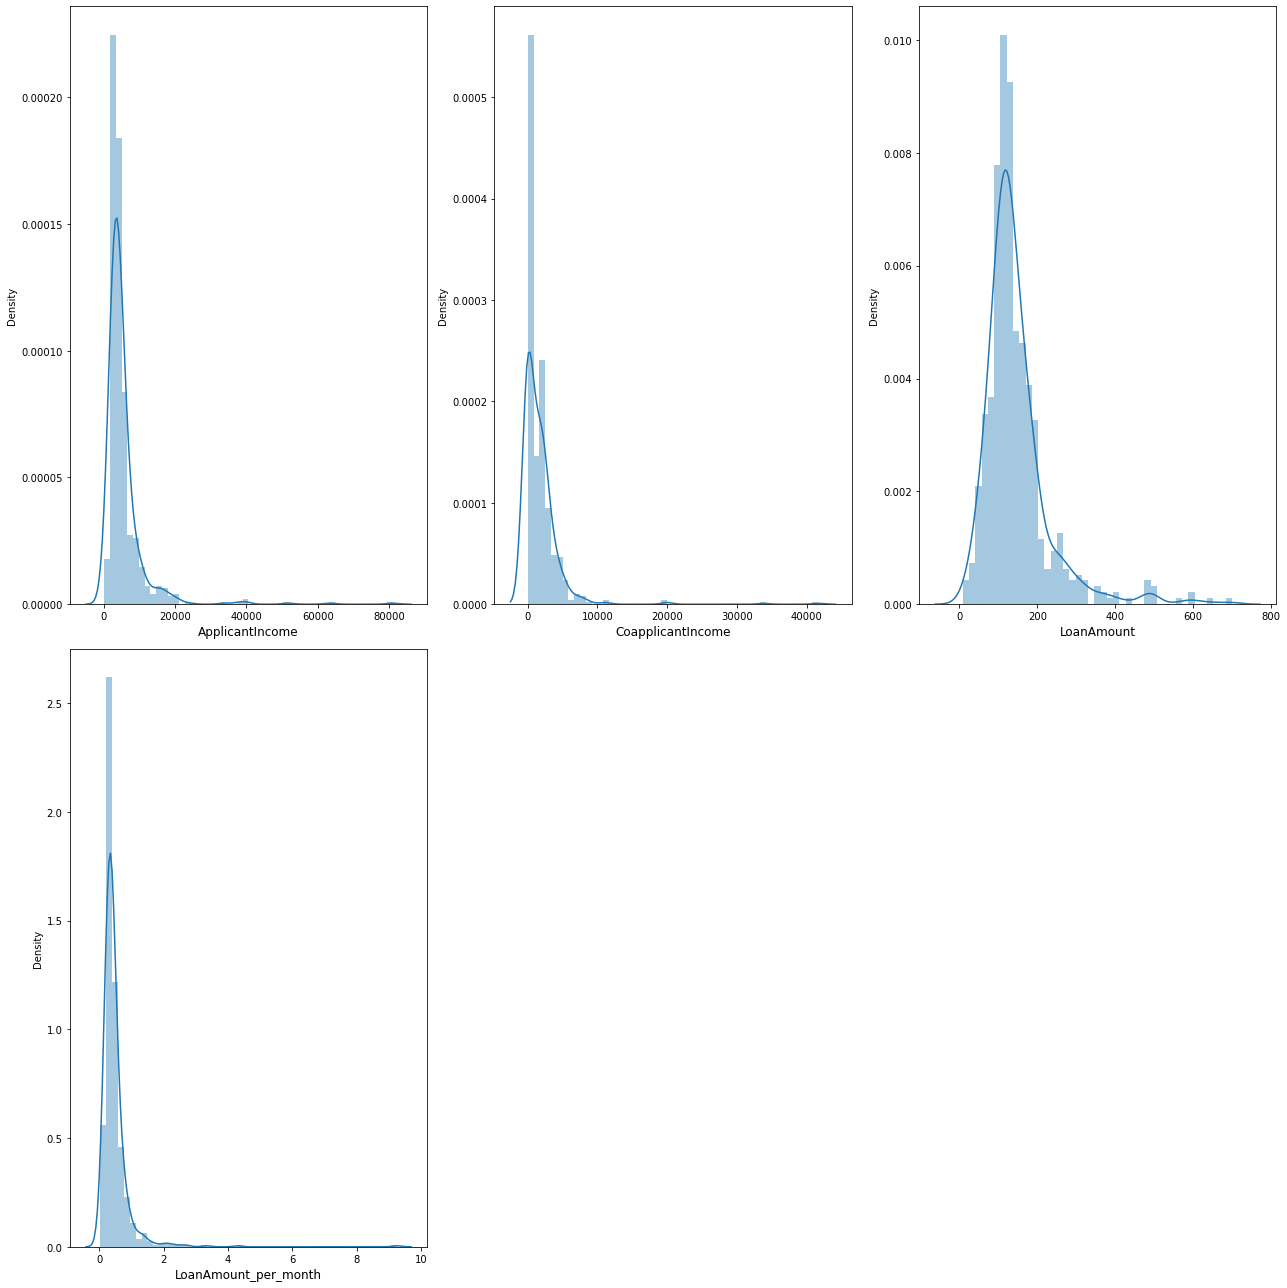

In [652]:
plt.figure(figsize=(18,18),facecolor="white")
plotnumber=1
for col in dfint:
    if plotnumber<=4:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(dfint[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From the above graph and we have all the data right skewed.

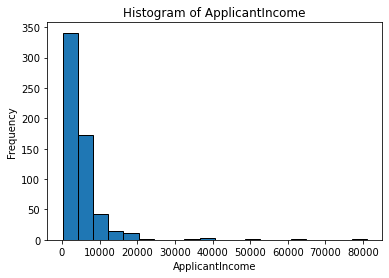

In [653]:
plt.figure(figsize=(6, 4))
plt.hist(df1['ApplicantIncome'], bins=20, edgecolor='k')
plt.title('Histogram of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()


from the above graph we can see that most of the data is in range 0-10000

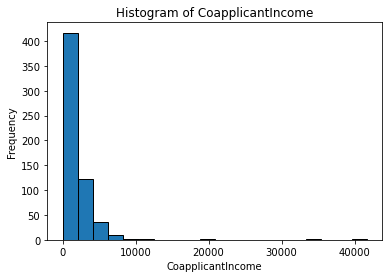

In [654]:
plt.figure(figsize=(6, 4))
plt.hist(df1['CoapplicantIncome'], bins=20, edgecolor='k')
plt.title('Histogram of CoapplicantIncome')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Frequency')
plt.show()


From the above graph we can see that most of the data is in range 0-7500

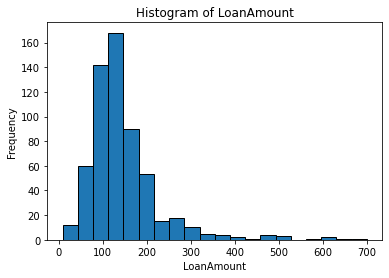

In [655]:
plt.figure(figsize=(6, 4))
plt.hist(df1['LoanAmount'], bins=20, edgecolor='k')
plt.title('Histogram of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()


From the above graph we can see that most of the data is in range 100-200

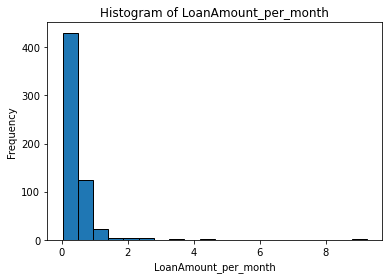

In [656]:
plt.figure(figsize=(6, 4))
plt.hist(df1['LoanAmount_per_month'], bins=20, edgecolor='k')
plt.title('Histogram of LoanAmount_per_month')
plt.xlabel('LoanAmount_per_month')
plt.ylabel('Frequency')
plt.show()


From the above graph we can see that most of the data is in range 0-2

In [726]:
dfcat=df1[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

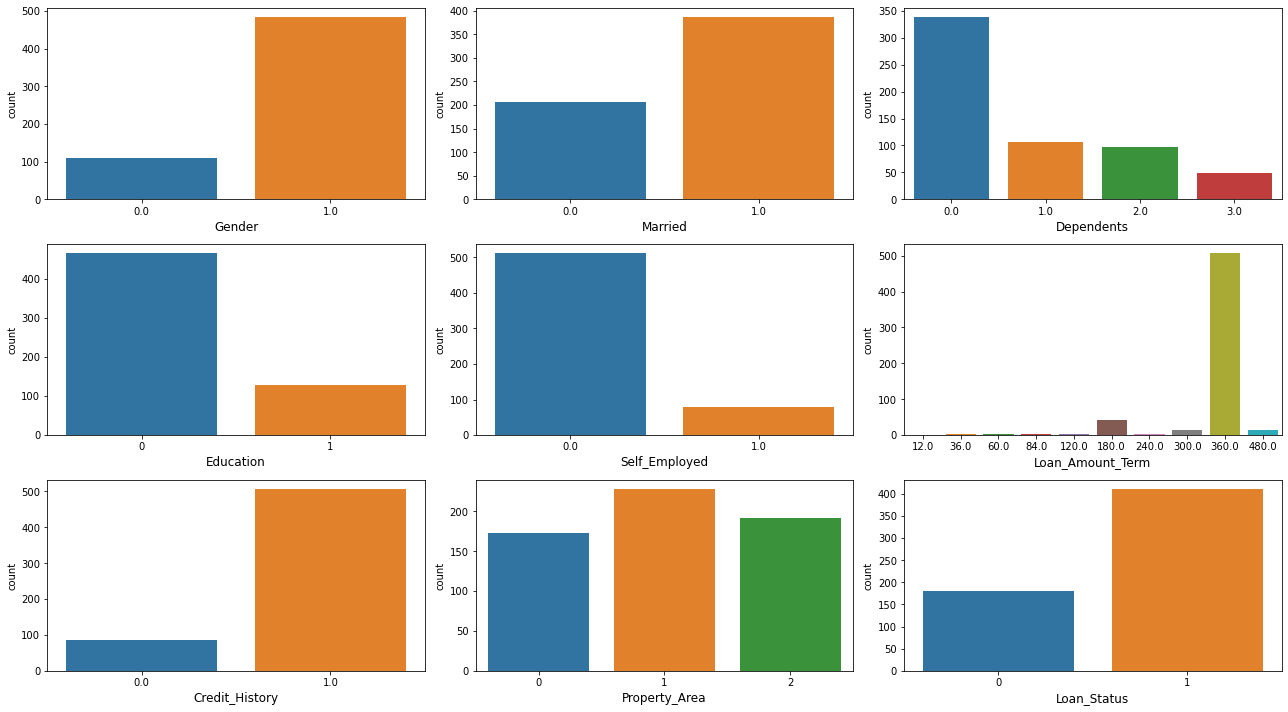

In [728]:
plt.figure(figsize=(18,10),facecolor="white")
plotnumber=1
for col in dfcat:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(dfcat[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

- Gender :- Male is 1 and Female is 0
- Married :- No is 0 and Yes is 1
- Education :- Graduate is 0 and Not Graduate is 1
- Self Employed :- No is 0 and yes is 1
- Property_Area :- Urban is 2 , Rural is 0 and Semi Urban is 1
- Loan_status :- Y is 1 and N is 0

from the above graph we can see that

- Female is less than Male
- Non-Married is less than Married.
- Graduation are more than Not graduated 
- Non- self employed is higher than self employed
- Loan term of 360 is higher than  rest of the other
- Semi Urban is higher than other.
- Loan status yes is higher than No.

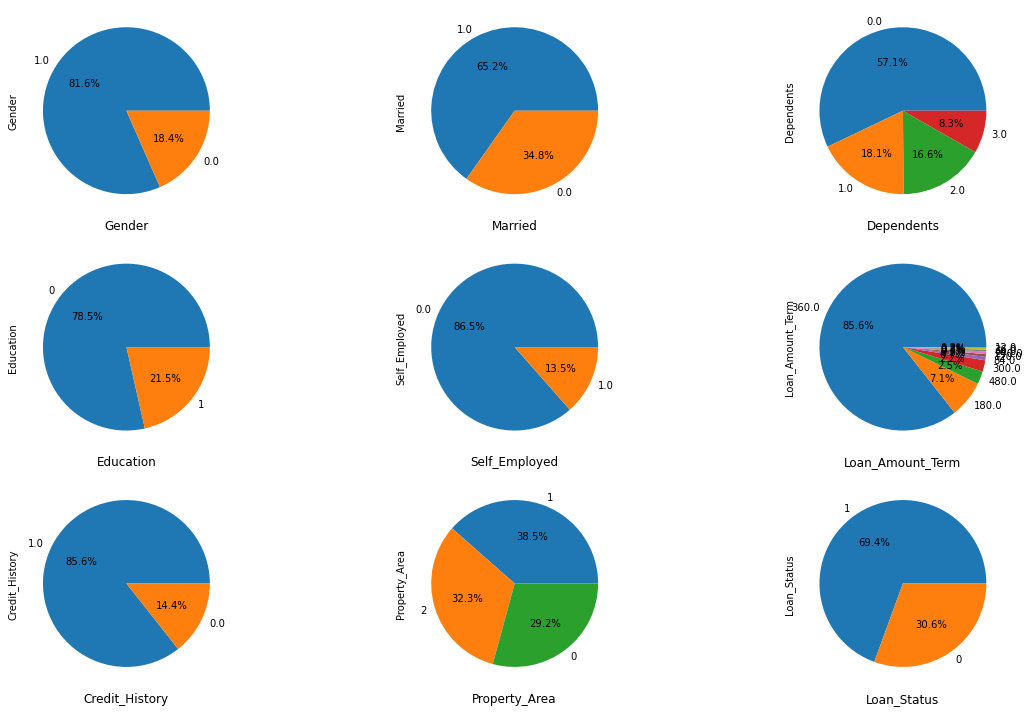

In [729]:
plt.figure(figsize=(18,10),facecolor="white")
plotnumber=1
for col in dfcat:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        dfcat[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

from the above graphs we can see the percentage distribution of all the catagorical columns.

### Bi-varient Analysis

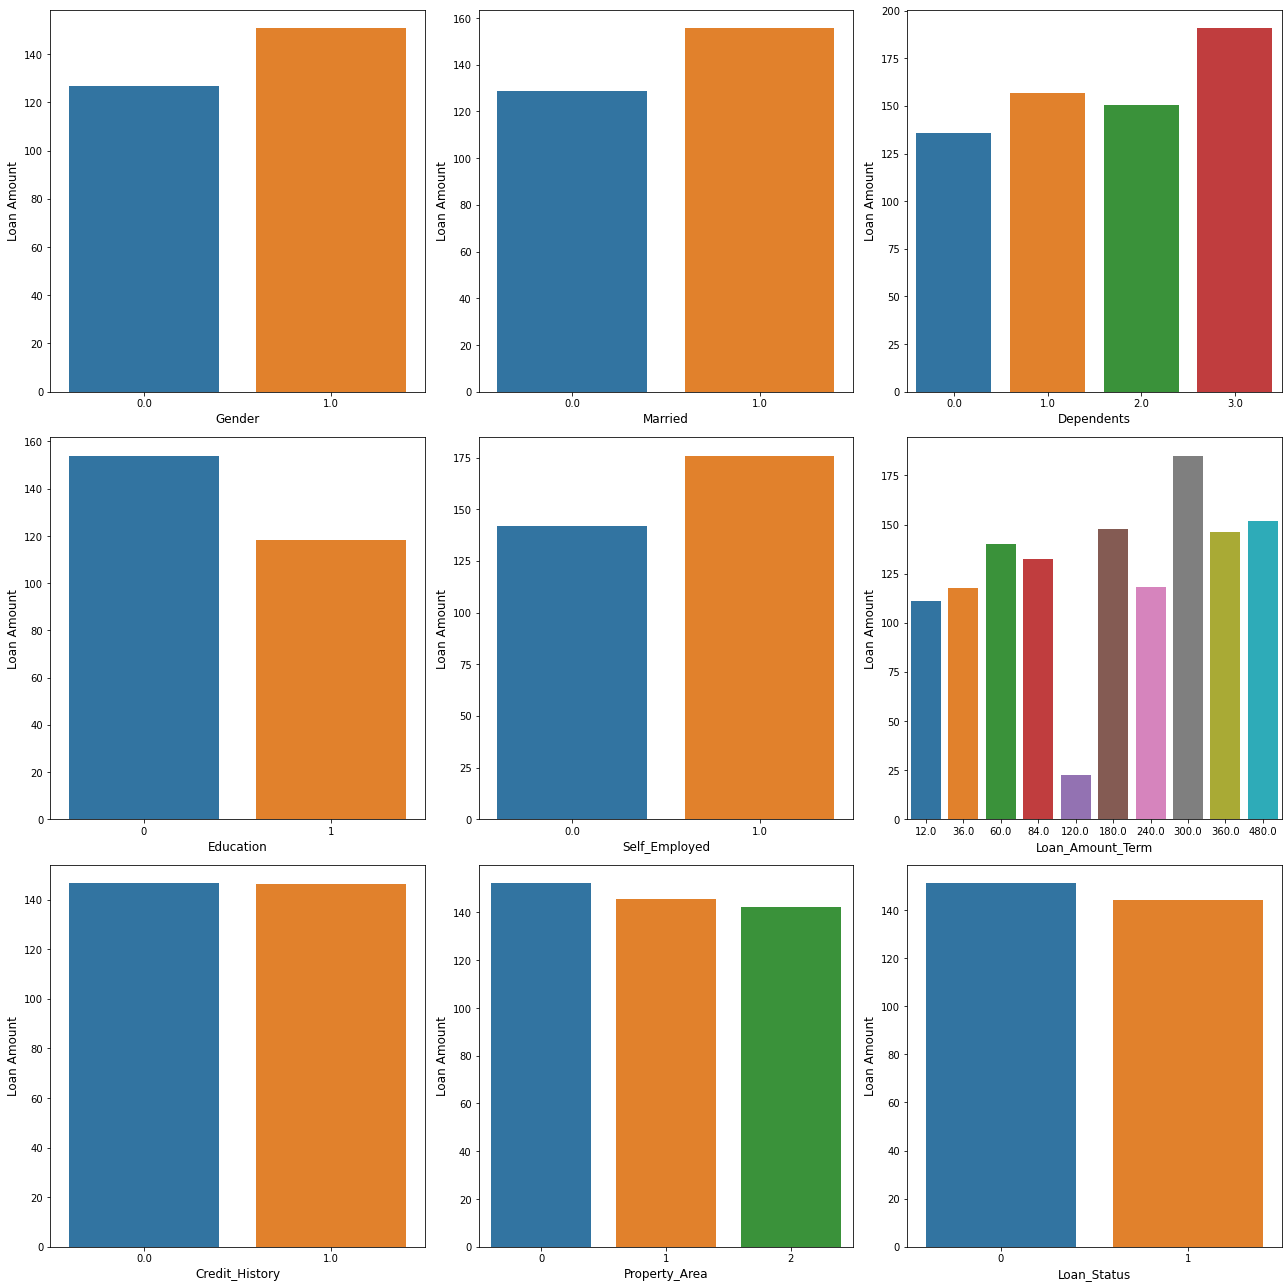

In [733]:
j=1
plt.figure(figsize=(18, 18))

for i, col in enumerate(dfcat.columns):
    if j <= 9:
        ax = plt.subplot(3,3,j)
        sns.barplot(data=dfcat, x=col, y=df1['LoanAmount'], ci=None, ax=ax)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Loan Amount', fontsize=12)
    j+=1
plt.tight_layout()
plt.show()


- Gender :- Male is 1 and Female is 0
- Married :- No is 0 and Yes is 1
- Education :- Graduate is 0 and Not Graduate is 1
- Self Employed :- No is 0 and yes is 1
- Property_Area :- Urban is 2 , Rural is 0 and Semi Urban is 1
- Loan_status :- Y is 1 and N is 0


From above graph we can see that
- LoanAmount is higher for Male
- LoanAmount is higher for Married
- LoanAmount is higher for 3 dependent
- LoanAmount is higher for Graduate
- LoanAmount is higher for Self Employed
- LoanAmount is higher for 300 tenure
- LoanAmount is equal for credit_History
- LoanAmount is higher for Rural
- LoanAmount is higher for Non loan status for first timer

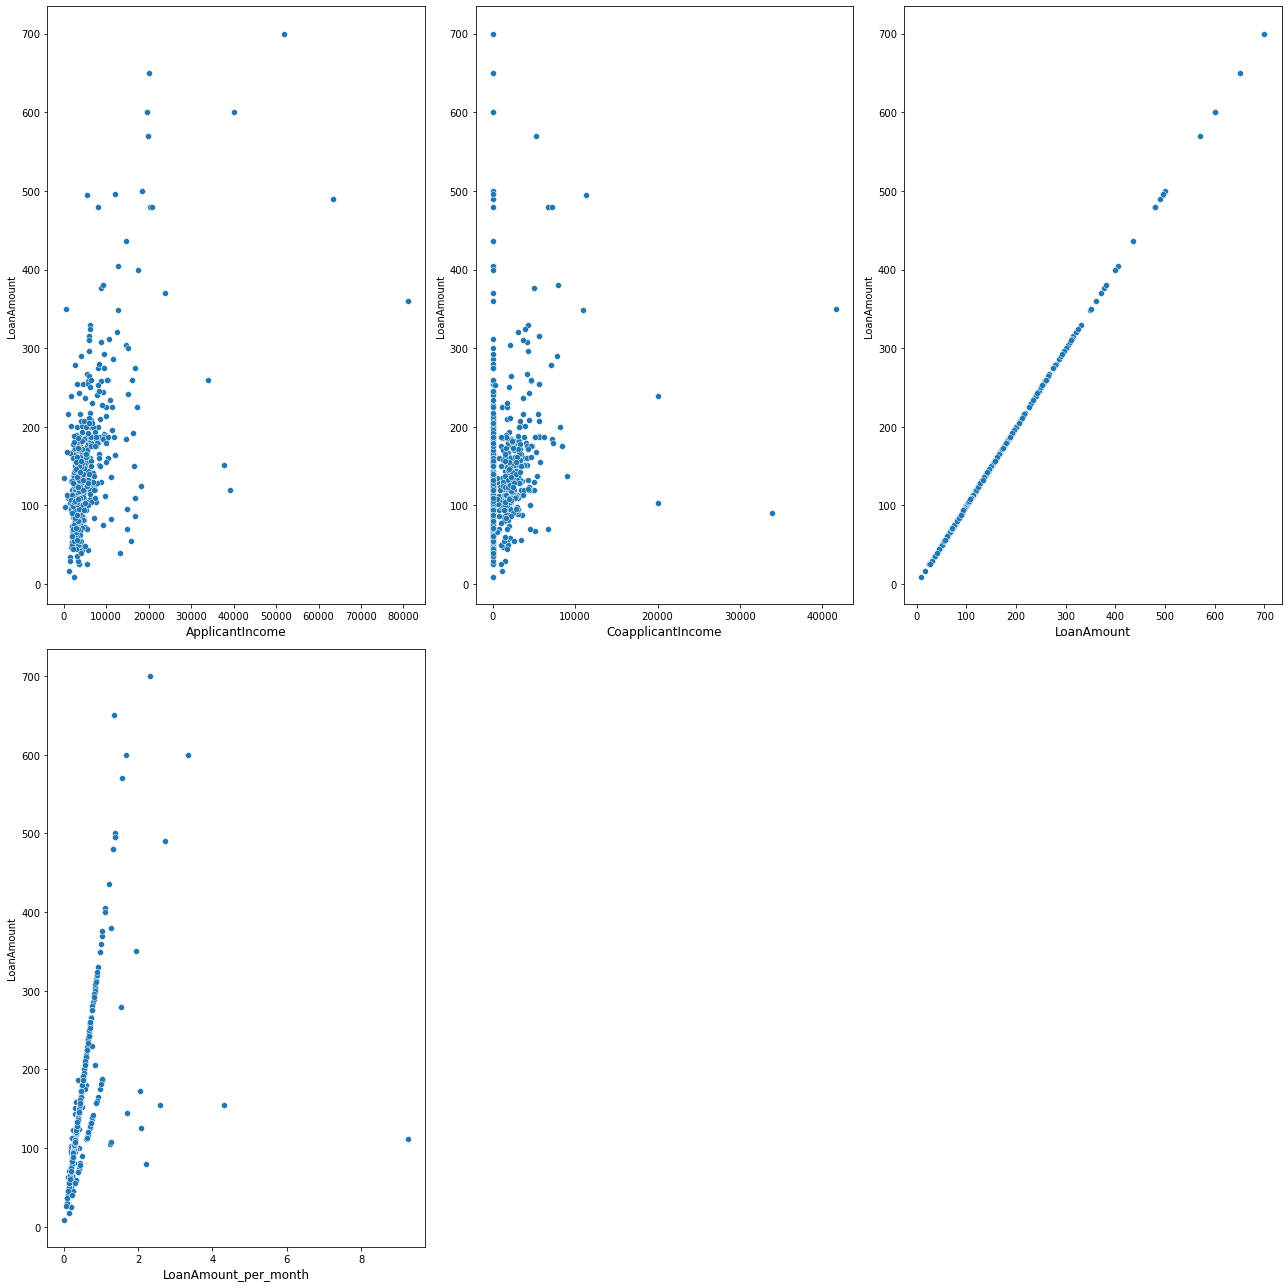

In [737]:
plt.figure(figsize=(18,18),facecolor="white")
plotnumber=1
for col in dfint:
    if plotnumber<=4:
        ax=plt.subplot(2,3,plotnumber)
        sns.scatterplot(dfint[col], df1['LoanAmount'])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From above graph we can see that there is some positive trend between 
- LoanAmount and ApplicantIncome
- LoanAmount and LoanAmount_per_month

### Multivarient Analysis

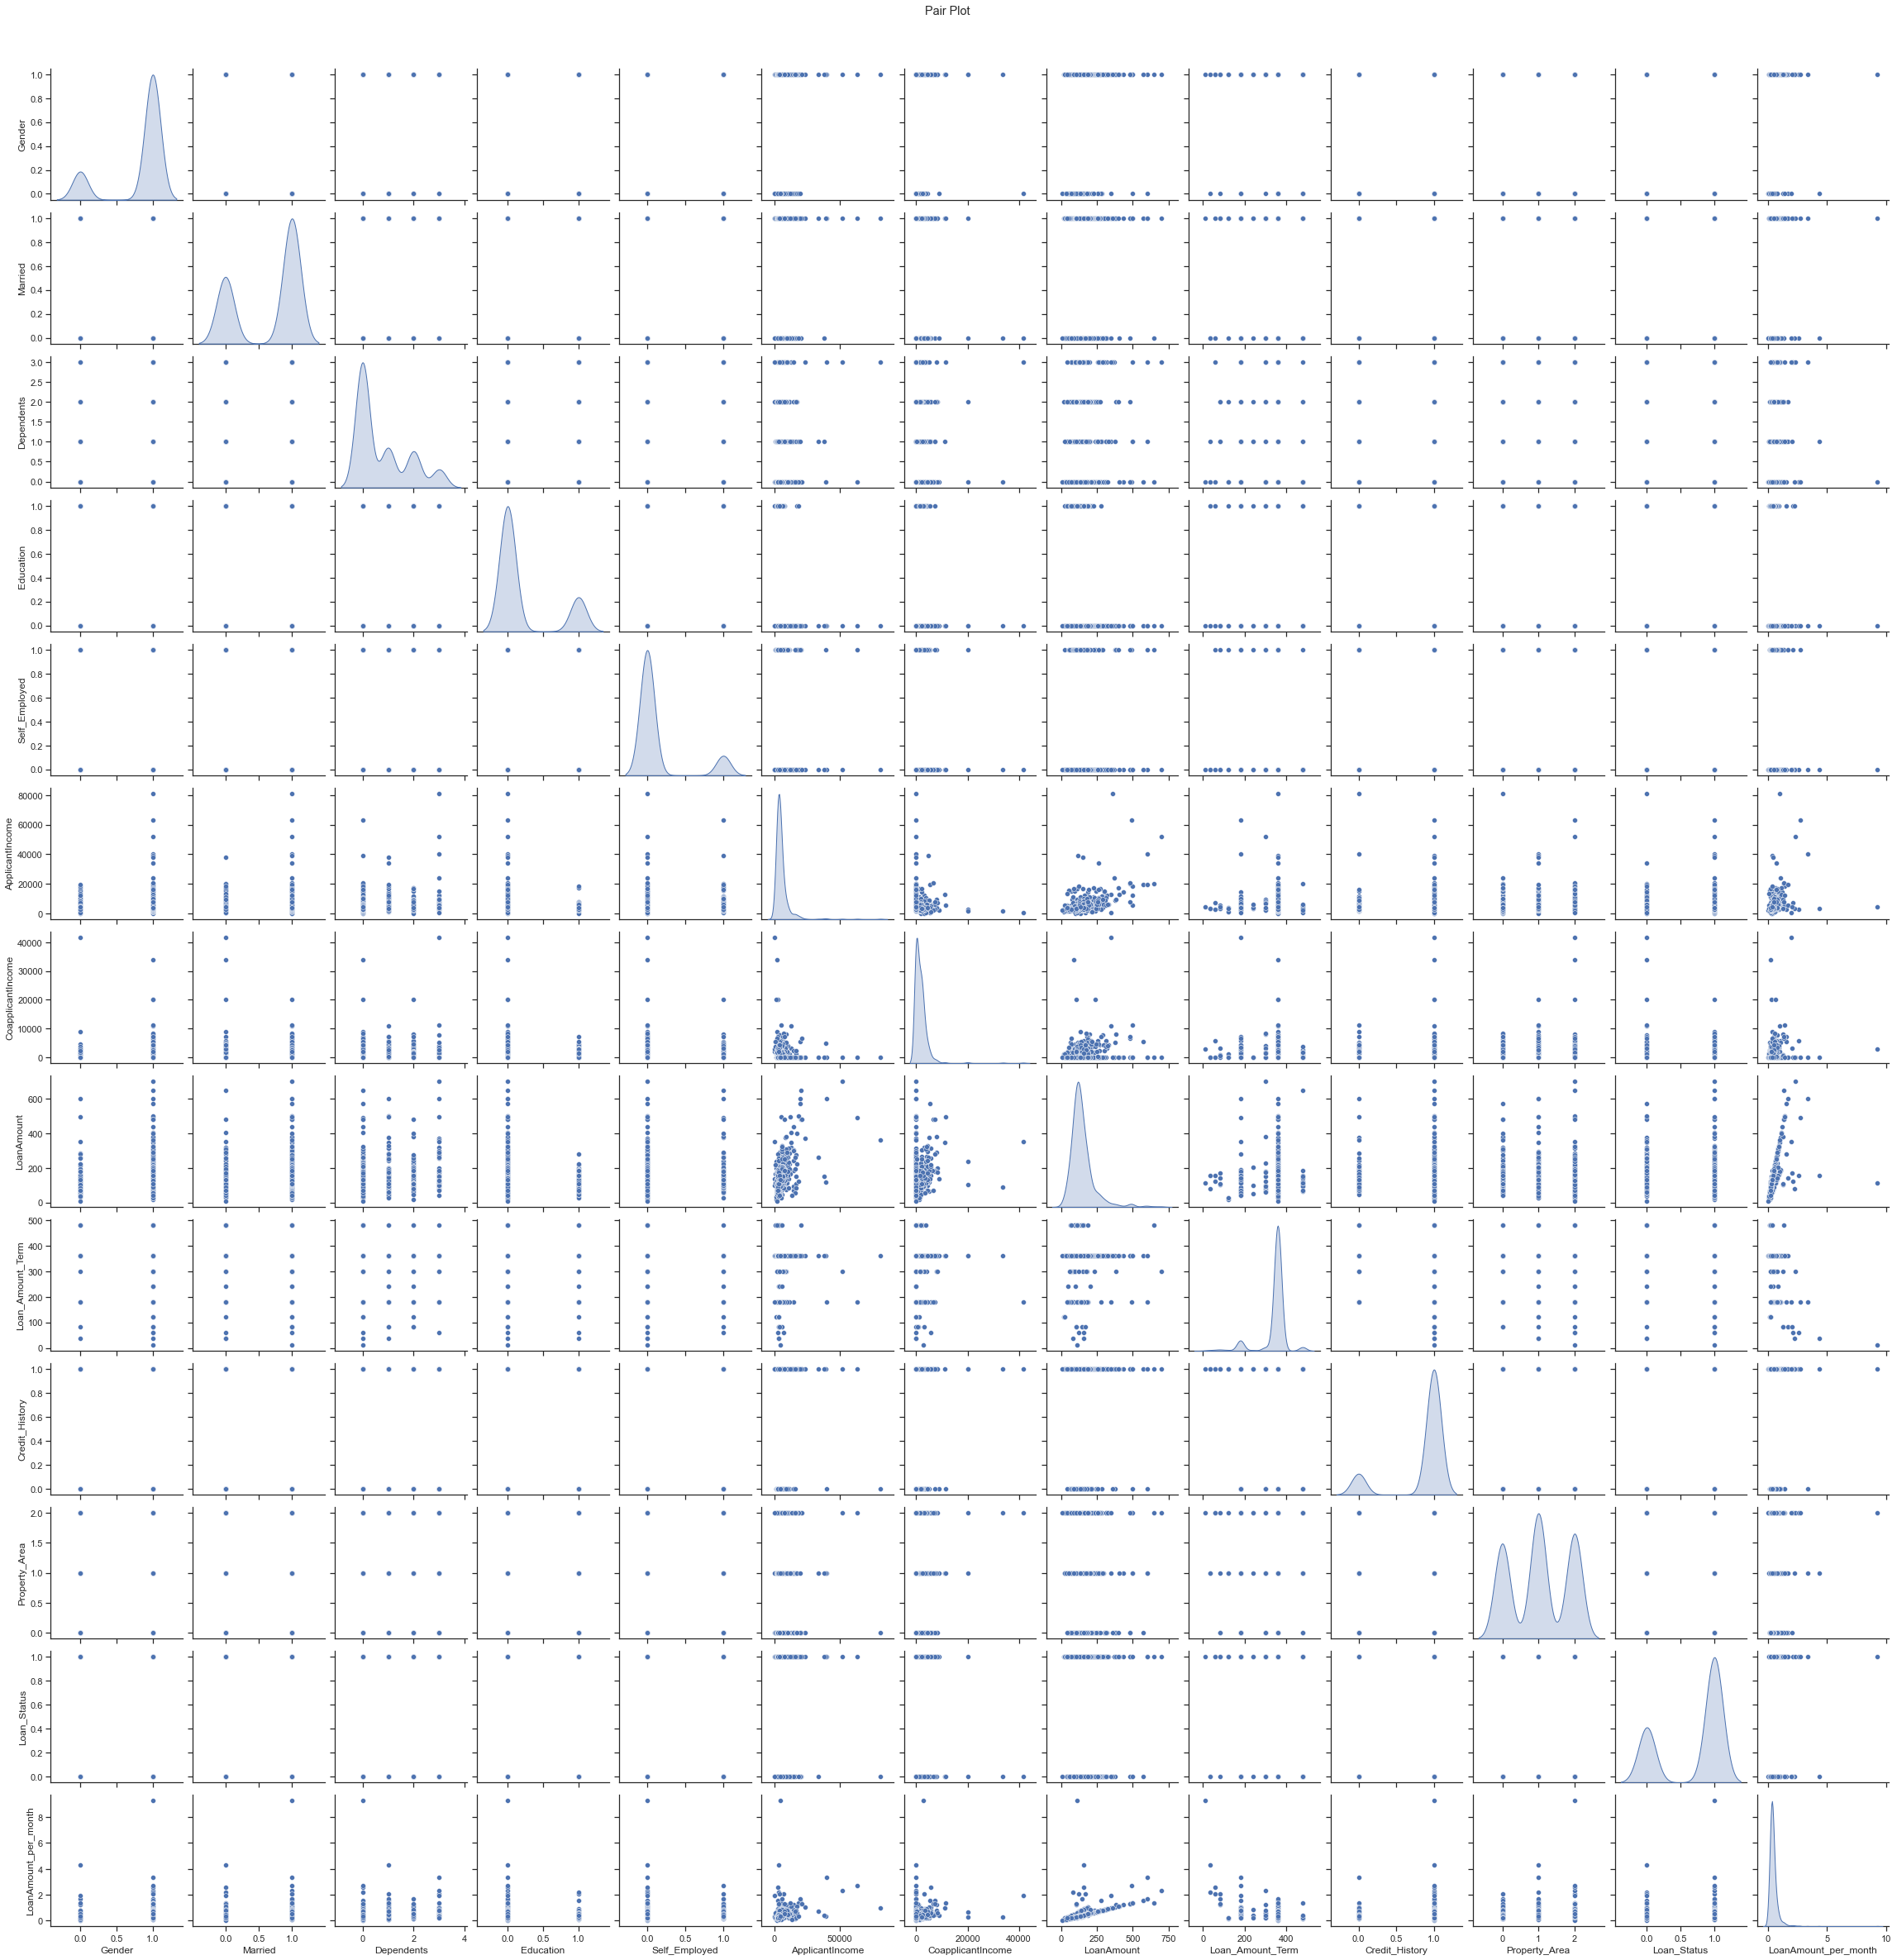

In [739]:
pair_plot_data = df1

# Create a pair plot
sns.set(style="ticks")
sns.pairplot(pair_plot_data, diag_kind="kde")
plt.suptitle("Pair Plot ", y=1.02)
plt.show()

we can see that most of the data is categorical data and some trends in continuous data which we found earlier.

## Checking outliers

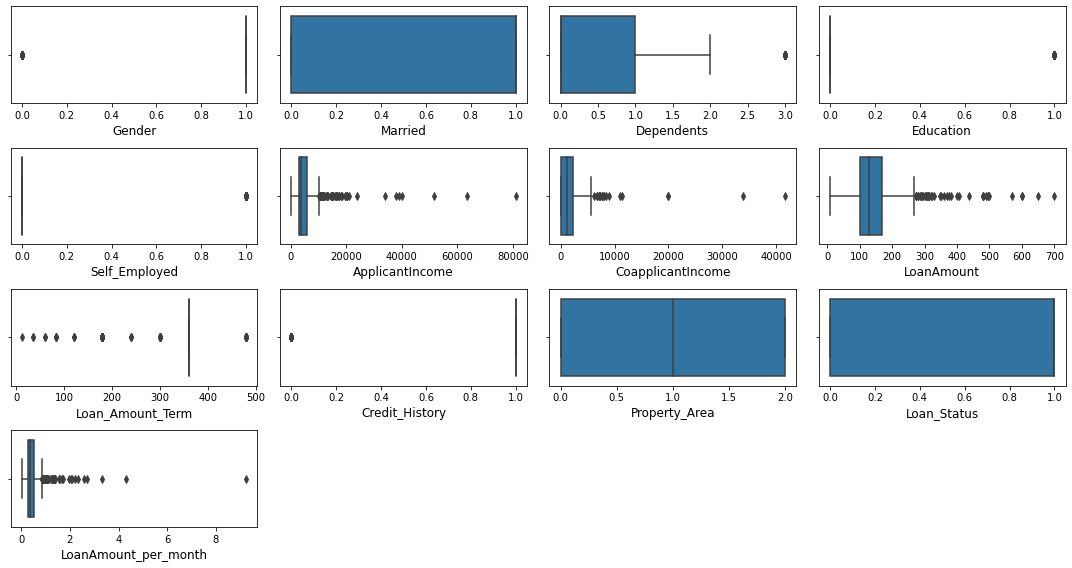

In [659]:
plt.figure(figsize=(15,8),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df1[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We have outliers in all the continues data but it is practically possible as Income may be as high as given and for high income , high amount of loan can be given.

## Checking skewness

In [660]:
df1.skew()

Gender                 -1.634133
Married                -0.639953
Dependents              0.985046
Education               1.394411
Self_Employed           2.139963
ApplicantIncome         6.574569
CoapplicantIncome       7.430310
LoanAmount              2.677552
Loan_Amount_Term       -2.405976
Credit_History         -2.037988
Property_Area          -0.053402
Loan_Status            -0.845416
LoanAmount_per_month    9.800350
dtype: float64

LoanAmount_per_month,ApplicantIncome,CoapplicantIncome are highly skewed

## Correlation

In [661]:
cor=df1.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_per_month
Gender,1.000000,0.366638,0.194515,0.046540,0.009303,0.062505,0.080765,0.109520,-0.079539,0.004346,-0.026064,0.025295,0.061873
Married,0.366638,1.000000,0.354936,0.010303,0.008691,0.050124,0.073770,0.149743,-0.095592,0.014384,0.010245,0.092497,0.094022
Dependents,0.194515,0.354936,1.000000,0.051029,0.050095,0.126165,0.036400,0.165425,-0.095532,-0.035414,0.004971,0.016725,0.101257
Education,0.046540,0.010303,0.051029,1.000000,-0.001952,-0.133305,-0.067249,-0.171133,-0.063005,-0.067654,-0.078050,-0.072977,-0.081170
Self_Employed,0.009303,0.008691,0.050095,-0.001952,1.000000,0.176291,-0.013832,0.136651,-0.052067,0.006855,-0.015339,-0.005797,0.075080
ApplicantIncome,0.062505,0.050124,0.126165,-0.133305,0.176291,1.000000,-0.113695,0.570909,-0.048588,-0.023219,-0.002015,-0.004514,0.324292
CoapplicantIncome,0.080765,0.073770,0.036400,-0.067249,-0.013832,-0.113695,1.000000,0.188619,-0.059346,0.008944,0.011966,-0.065034,0.135536
LoanAmount,0.109520,0.149743,0.165425,-0.171133,0.136651,0.570909,0.188619,1.000000,0.036981,-0.001463,-0.045792,-0.037318,0.491795
Loan_Amount_Term,-0.079539,-0.095592,-0.095532,-0.063005,-0.052067,-0.048588,-0.059346,0.036981,1.000000,0.001359,-0.069952,-0.031256,-0.501511
Credit_History,0.004346,0.014384,-0.035414,-0.067654,0.006855,-0.023219,0.008944,-0.001463,0.001359,1.000000,-0.002555,0.543814,0.013461


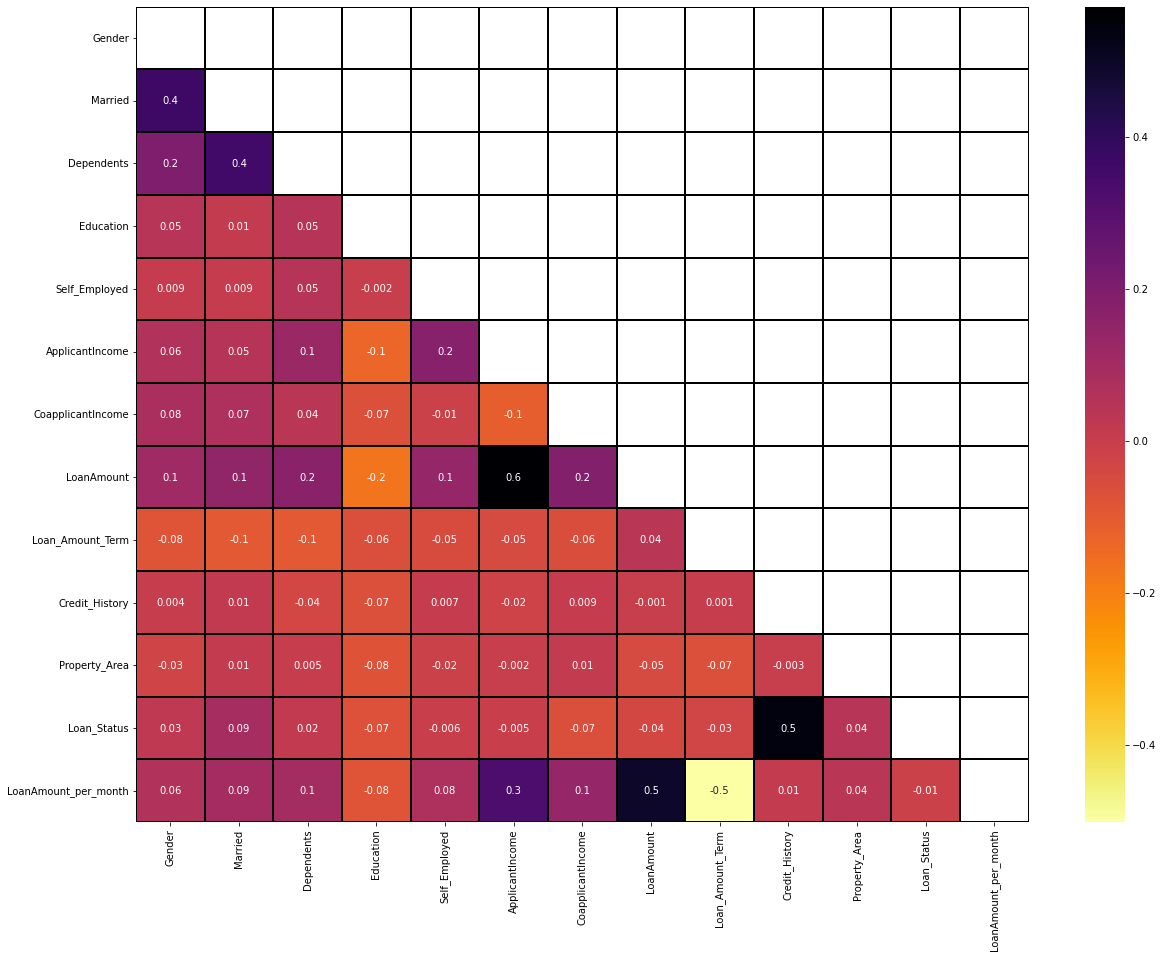

In [662]:
# Visualizing the correlation matrix by plotting heatmap
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df1.corr(), mask=mask, cmap='inferno_r', annot=True, fmt=".1g", linewidths=0.1, ax=ax,linecolor="black")
plt.yticks(rotation=0);
plt.show()

loan amount is correlated with ApplicatIncome and loanAmount per month.

In [663]:
# correlation with target variable
df1.corr().LoanAmount.sort_values()


Education              -0.171133
Property_Area          -0.045792
Loan_Status            -0.037318
Credit_History         -0.001463
Loan_Amount_Term        0.036981
Gender                  0.109520
Self_Employed           0.136651
Married                 0.149743
Dependents              0.165425
CoapplicantIncome       0.188619
LoanAmount_per_month    0.491795
ApplicantIncome         0.570909
LoanAmount              1.000000
Name: LoanAmount, dtype: float64

Spliting the features and label

In [664]:
x=df.drop('LoanAmount',axis=1)
y=df.LoanAmount

In [665]:
# x= np.cbrt(x)

In [666]:
# x.skew()

In [667]:
# x.columns

In [668]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [669]:
x=pd.DataFrame(x,columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status','LoanAmount_per_month'])

In [670]:
x.skew()

Gender                 -1.634133
Married                -0.639953
Dependents              0.394360
Education               1.394411
Self_Employed           2.139963
ApplicantIncome        -0.091509
CoapplicantIncome      -0.156192
Loan_Amount_Term        0.386253
Credit_History         -2.037988
Property_Area          -0.153260
Loan_Status            -0.845416
LoanAmount_per_month    0.073169
dtype: float64

As we can see the value is under 2.67 which was for label so we will take it as accaptable value.

## VIF

In [671]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns


vif

,VIF values,Features
0,1.209794,Gender
1,1.446602,Married
2,1.219745,Dependents
3,1.063045,Education
4,1.051828,Self_Employed
5,1.793312,ApplicantIncome
6,1.545036,CoapplicantIncome
7,1.202487,Loan_Amount_Term
8,1.430064,Credit_History
9,1.025432,Property_Area


All the value are in acceptable range hence no multicolinierity.

## Features selection

In [672]:
from sklearn.feature_selection import SelectKBest,f_classif

In [673]:
best_features = SelectKBest(score_func=f_classif,k=12) # run multiple time and find the best

fit=best_features.fit(x,y)

df_scores=pd.DataFrame(fit.scores_)

df_columns=pd.DataFrame(x.columns)

# concatenate dataframe
feature_scores=pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns=['Feature_Name','Score'] # name output columns
print(feature_scores.nlargest(12,'Score')) # print 12 best features

            Feature_Name      Score
11  LoanAmount_per_month  10.455746
5        ApplicantIncome   2.962554
6      CoapplicantIncome   1.331030
2             Dependents   1.237692
9          Property_Area   1.097023
4          Self_Employed   1.073927
8         Credit_History   1.065469
1                Married   1.045092
7       Loan_Amount_Term   1.023081
10           Loan_Status   1.014979
0                 Gender   0.990479
3              Education   0.803392


We have only 11 features and all are important for loanAmount so we are going to keep all.

# Model building

In [674]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

## Checking the random state

In [675]:
random_states = range(1, 200)
r2_scores = []

for rs in random_states:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=rs)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    r2 = r2_score(y_test, pred)
    r2_scores.append(r2)

max_r2 = max(r2_scores)
max_rs = random_states[r2_scores.index(max_r2)]

print("Best accuracy is", max_r2, "at random_state", max_rs)


Best accuracy is 0.7909862116431373 at random_state 103


## Train test split

In [676]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=max_rs)

In [677]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor 

In [678]:
training_r2_score = []
testing_r2_score = []

In [679]:
def model_prediction(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    a = r2_score(y_train,y_pred)*100
    b = r2_score(y_test,pred)*100
    training_r2_score.append(a)
    testing_r2_score.append(b)
    print(f"R2_Score of {model} model on Training Data is:",a)
    print(f"R2_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Mean Absolute Error of {model} model is:",mean_absolute_error(y_test,pred))
    print(f"Mean Square Error of {model} model is:", mean_squared_error(y_test,pred))
    print(f"Squarroot Mean Square Error  {model} model is:",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n------------------------------------------------------------------------")

In [680]:
model_prediction(LinearRegression())

R2_Score of LinearRegression() model on Training Data is: 70.49739571873741
R2_Score of LinearRegression() model on Testing Data is: 79.09862116431373

------------------------------------------------------------------------
Mean Absolute Error of LinearRegression() model is: 22.151057805310664
Mean Square Error of LinearRegression() model is: 1256.3361524882941
Squarroot Mean Square Error  LinearRegression() model is: 35.44483252165672

------------------------------------------------------------------------


In [681]:
lasscv=LassoCV(alphas=None,max_iter=10)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=10)

In [682]:
alpha=lasscv.alpha_
alpha

2.8382064498327857

In [683]:
model_prediction(Lasso(alpha))

R2_Score of Lasso(alpha=2.8382064498327857) model on Training Data is: 69.6778798589117
R2_Score of Lasso(alpha=2.8382064498327857) model on Testing Data is: 79.80835721881019

------------------------------------------------------------------------
Mean Absolute Error of Lasso(alpha=2.8382064498327857) model is: 20.708137589966146
Mean Square Error of Lasso(alpha=2.8382064498327857) model is: 1213.6754710567945
Squarroot Mean Square Error  Lasso(alpha=2.8382064498327857) model is: 34.837845384822444

------------------------------------------------------------------------


In [684]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [685]:
model_prediction(Ridge(alpha=ridgecv.alpha_))

R2_Score of Ridge(alpha=0.09099999999999998) model on Training Data is: 70.49738970614243
R2_Score of Ridge(alpha=0.09099999999999998) model on Testing Data is: 79.09525157330219

------------------------------------------------------------------------
Mean Absolute Error of Ridge(alpha=0.09099999999999998) model is: 22.149464537276685
Mean Square Error of Ridge(alpha=0.09099999999999998) model is: 1256.5386912317988
Squarroot Mean Square Error  Ridge(alpha=0.09099999999999998) model is: 35.447689504843595

------------------------------------------------------------------------


In [686]:
model_prediction(SVR())

R2_Score of SVR() model on Training Data is: 8.509722978468915
R2_Score of SVR() model on Testing Data is: 11.902772438394472

------------------------------------------------------------------------
Mean Absolute Error of SVR() model is: 41.92940492834746
Mean Square Error of SVR() model is: 5295.331604184053
Squarroot Mean Square Error  SVR() model is: 72.76902915515674

------------------------------------------------------------------------


In [687]:
model_prediction(RandomForestRegressor())

R2_Score of RandomForestRegressor() model on Training Data is: 99.0273912055773
R2_Score of RandomForestRegressor() model on Testing Data is: 95.4558509296425

------------------------------------------------------------------------
Mean Absolute Error of RandomForestRegressor() model is: 5.504767932489451
Mean Square Error of RandomForestRegressor() model is: 273.1388586497891
Squarroot Mean Square Error  RandomForestRegressor() model is: 16.52691316156133

------------------------------------------------------------------------


In [688]:
model_prediction(GradientBoostingRegressor())

R2_Score of GradientBoostingRegressor() model on Training Data is: 99.87699090700674
R2_Score of GradientBoostingRegressor() model on Testing Data is: 96.29356900996505

------------------------------------------------------------------------
Mean Absolute Error of GradientBoostingRegressor() model is: 5.290005580045564
Mean Square Error of GradientBoostingRegressor() model is: 222.78545765284673
Squarroot Mean Square Error  GradientBoostingRegressor() model is: 14.925999385396166

------------------------------------------------------------------------


In [689]:
model_prediction(DecisionTreeRegressor())

R2_Score of DecisionTreeRegressor() model on Training Data is: 100.0
R2_Score of DecisionTreeRegressor() model on Testing Data is: 94.22149432866111

------------------------------------------------------------------------
Mean Absolute Error of DecisionTreeRegressor() model is: 5.383966244725738
Mean Square Error of DecisionTreeRegressor() model is: 347.3333333333333
Squarroot Mean Square Error  DecisionTreeRegressor() model is: 18.636880997992485

------------------------------------------------------------------------


In [690]:
model_prediction(KNeighborsRegressor())

R2_Score of KNeighborsRegressor() model on Training Data is: 73.19218800462745
R2_Score of KNeighborsRegressor() model on Testing Data is: 48.96861654080064

------------------------------------------------------------------------
Mean Absolute Error of KNeighborsRegressor() model is: 30.670886075949365
Mean Square Error of KNeighborsRegressor() model is: 3067.384810126582
Squarroot Mean Square Error  KNeighborsRegressor() model is: 55.3839761133722

------------------------------------------------------------------------


In [691]:
model_prediction(AdaBoostRegressor())

R2_Score of AdaBoostRegressor() model on Training Data is: 95.96916174632267
R2_Score of AdaBoostRegressor() model on Testing Data is: 92.09738119777239

------------------------------------------------------------------------
Mean Absolute Error of AdaBoostRegressor() model is: 12.637720416591424
Mean Square Error of AdaBoostRegressor() model is: 475.00912636543325
Squarroot Mean Square Error  AdaBoostRegressor() model is: 21.794704089880028

------------------------------------------------------------------------


In [692]:
model_prediction(XGBRegressor ())

R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.99995439508756
R2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [693]:
models=['LinearRegression','Lasso','Ridge','SVR','RandomForestRegressor','GradientBoostingRegressor','DecisionTreeRegressor','KNeighborsRegressor','AdaBoostRegressor','XGBRegressor']

## Model Analysis

In [694]:
df5 = pd.DataFrame({"Algorithms":models,
                   "Training R2 Score":training_r2_score,
                   "Testing R2 Score":testing_r2_score
                  })
df5

,Algorithms,Training R2 Score,Testing R2 Score
0,LinearRegression,70.497396,79.098621
1,Lasso,69.677880,79.808357
2,Ridge,70.497390,79.095252
3,SVR,8.509723,11.902772
4,RandomForestRegressor,99.027391,95.455851
5,GradientBoostingRegressor,99.876991,96.293569
6,DecisionTreeRegressor,100.000000,94.221494
7,KNeighborsRegressor,73.192188,48.968617
8,AdaBoostRegressor,95.969162,92.097381
9,XGBRegressor,99.999954,95.411807


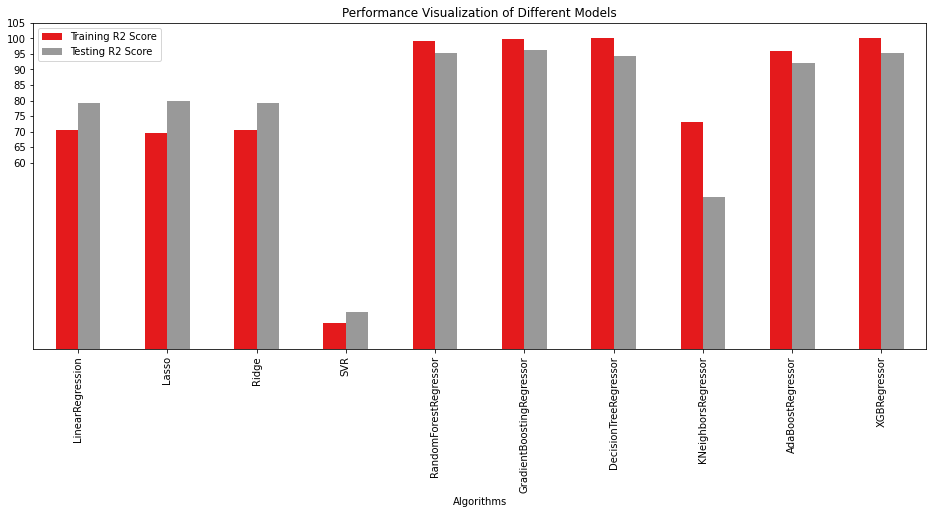

In [695]:
df5.plot(x="Algorithms",y=["Training R2 Score","Testing R2 Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.yticks(range(60,106,5))
plt.show()

## Cross validation

In [696]:
from sklearn.model_selection import cross_val_score

In [697]:
num_folds_range = range(2,20)

model = LinearRegression()

fold_performance = {}

for num_folds in num_folds_range:
    scores = cross_val_score(model, x, y, cv=num_folds, scoring='neg_mean_squared_error')  # or 'r2' for coefficient of determination
    fold_performance[num_folds] = {
        'mean': np.mean(scores),
        'std': np.std(scores)
    }
    
df_fold_performance = pd.DataFrame(fold_performance).transpose()

print(df_fold_performance)

           mean          std
2  -2126.355780    50.261575
3  -2093.924888   304.049102
4  -2047.328683   391.346208
5  -2090.901278  1001.921764
6  -2091.452557  1062.126099
7  -2099.306939  1173.276754
8  -2058.294104   880.518597
9  -2099.534575  1219.414125
10 -2118.371705  1650.934036
11 -2068.668252  1077.520392
12 -2052.915920  1095.051825
13 -2100.293117  1634.492445
14 -2108.031632  1621.889856
15 -2052.103320  1319.072649
16 -2072.549891  1454.396773
17 -2122.260250  1844.858525
18 -2088.456789  1639.353299
19 -2067.985146  1431.686335


CV 8 is best tradeoff 

In [698]:
# checking cv score for logistic Regression
score = cross_val_score(LinearRegression(),x,y,cv=8)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[0]/100)- score.mean())

[0.7894273  0.74000546 0.64885877 0.6894336  0.7372816  0.79909872
 0.73451333 0.64712524]
0.7232180038248383
Differnet between Accuracy score and cross validation score is-  0.06776820781829906


In [699]:
# checking cv score for logistic Regression
score = cross_val_score(Lasso(),x,y,cv=8)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[1]/100)- score.mean())

[0.79808    0.74571317 0.65340137 0.7070237  0.73705992 0.80913987
 0.73222627 0.65091861]
0.7291953647337421
Differnet between Accuracy score and cross validation score is-  0.06888820745435975


In [700]:
# checking cv score for logistic Regression
score = cross_val_score(Ridge(),x,y,cv=8)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[2]/100)- score.mean())

[0.79070663 0.73981714 0.64871867 0.69001066 0.73708105 0.79948855
 0.73404742 0.64737674]
0.7234058575649811
Differnet between Accuracy score and cross validation score is-  0.06754665816804084


In [701]:
# checking cv score for logistic Regression
score = cross_val_score(SVR(),x,y,cv=8)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[3]/100)- score.mean())

[0.28612387 0.06676513 0.12541607 0.17928576 0.08382744 0.2234938
 0.1150517  0.09449023]
0.1468067506623533
Differnet between Accuracy score and cross validation score is-  -0.027779026278408586


In [702]:
# checking cv score for logistic Regression
score = cross_val_score(RandomForestRegressor(),x,y,cv=8)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[4]/100)- score.mean())

[0.97844049 0.94540694 0.91861538 0.95654512 0.97776006 0.97974338
 0.97223279 0.95610954]
0.9606067133345532
Differnet between Accuracy score and cross validation score is-  -0.006048204038128224


In [703]:
# checking cv score for logistic Regression
score = cross_val_score(GradientBoostingRegressor(),x,y,cv=8)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[5]/100)- score.mean())

[0.98711371 0.95097195 0.95119092 0.97335218 0.97815687 0.99267544
 0.95598362 0.96494769]
0.969299045616514
Differnet between Accuracy score and cross validation score is-  -0.006363355516863511


In [704]:
# checking cv score for logistic Regression
score = cross_val_score(DecisionTreeRegressor(),x,y,cv=8)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[6]/100)- score.mean())

[0.9570193  0.80589512 0.90890303 0.85608536 0.86343572 0.98338705
 0.95602305 0.9476138 ]
0.9097953028920376
Differnet between Accuracy score and cross validation score is-  0.03241964039457346


In [705]:
# checking cv score for logistic Regression
score = cross_val_score(KNeighborsRegressor(),x,y,cv=8)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[7]/100)- score.mean())

[0.74969251 0.48744613 0.5239413  0.57777331 0.6134726  0.645546
 0.5475114  0.50755532]
0.5816173197991182
Differnet between Accuracy score and cross validation score is-  -0.09193115439111182


In [706]:
# checking cv score for logistic Regression
score = cross_val_score(AdaBoostRegressor(),x,y,cv=8)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[8]/100)- score.mean())

[0.92135136 0.89362997 0.86587163 0.84012916 0.92269999 0.88957184
 0.92221232 0.88717857]
0.8928306053602185
Differnet between Accuracy score and cross validation score is-  0.028143206617505356


In [707]:
# checking cv score for logistic Regression
score = cross_val_score(XGBRegressor(),x,y,cv=8)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_r2_score[9]/100)- score.mean())

[0.99338381 0.94063918 0.91711832 0.96979053 0.97159422 0.97743097
 0.95123992 0.96471109]
0.9607385047229287
Differnet between Accuracy score and cross validation score is-  -0.006620438468650902


GradientBoostingRegressor and XGBRegressor best models as the score is maximum and diffrenect is less.

## GridSearch CV

In [708]:
from sklearn.model_selection import GridSearchCV

### XGBRegressor

In [709]:
model1=XGBRegressor()

In [710]:
parameters ={'booster':['gbtree', 'gblinear', 'dart'],
             'learning_rate':[0.005,.01,.02],
             'disable_default_eval_metric':[True,False]
             }
grid_search = GridSearchCV(model1, param_grid=parameters, cv=8)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=8,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'disable_default_eval_metric': [True, False],
                         'learning_rate': [0.005, 0.01, 0.02]})

In [711]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'booster': 'gbtree',
 'disable_default_eval_metric': True,
 'learning_rate': 0.02}

In [712]:
model1=XGBRegressor(booster= 'gbtree', disable_default_eval_metric= True, learning_rate= 0.02)

In [713]:
model1.fit(x_train,y_train)

x_test_pred = model1.predict(x_test)

r2_score(y_test,x_test_pred)

0.8436520058712964

### GradientBoostingRegressor

In [714]:
model2=GradientBoostingRegressor()

In [715]:
param_grid={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
           'criterion':['friedman_mse', 'squared_error'],
           'learning_rate':[.005,.01,.02,.04],
           'n_estimators':[50,100,150]}

In [716]:
grid_search = GridSearchCV(model2, param_grid=param_grid, cv=8)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.005, 0.01, 0.02, 0.04],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [50, 100, 150]})

In [717]:
grid_search.best_estimator_
best=grid_search.best_params_
best

{'criterion': 'squared_error',
 'learning_rate': 0.04,
 'loss': 'huber',
 'n_estimators': 150}

In [718]:
model2=GradientBoostingRegressor(criterion= 'squared_error', learning_rate= 0.04 , loss= 'huber', n_estimators= 150)

In [720]:
model2.fit(x_train,y_train)

x_test_pred2 = model2.predict(x_test)

r2_score(y_test,x_test_pred2)

0.9739882045044987

## Saving the model

In [721]:
import pickle
filename='LoanAmount.pkl'
pickle.dump(model2,open(filename,'wb'))#saved model

## Loading model

In [722]:
loaded_model=pickle.load(open('LoanAmount.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

97.39882045044988


In [723]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,227,228,229,230,231,232,233,234,235,236
Predicted,187.800704,49.005534,302.710352,96.35737,116.951606,104.022013,85.209869,210.399117,172.352407,81.739225,...,245.373206,159.119217,145.465308,173.091238,154.812601,422.597689,137.070768,124.031888,66.467157,110.118364
Original,187.000000,46.000000,300.000000,96.00000,115.000000,104.000000,100.000000,175.000000,152.000000,81.000000,...,244.000000,161.000000,144.000000,173.000000,152.000000,436.000000,138.000000,124.000000,67.000000,108.000000
